In [1]:
import sys
import datetime
import random
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import figure

# AVL tree

In [2]:
class AVLTreeNode(object):
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1
        #increase size of node
        self.value1 = key
        self.value2 = key
 
 
class AVLTree(object):
 
    def find(self, root, key):
        while root:
            if root.key == key:
                print("Found")
                break
            root = root.right if root.key < key else root.left
        return root
 
    def rangeSearch(self, root, k1, k2):
        if root is None:
            return
 
        if k1 < root.key :
            self.rangeSearch(root.left, k1, k2)
 
        if k1 <= root.key and k2 >= root.key:
            print(root.key, end=', '),
 
        if k2 > root.key:
            self.rangeSearch(root.right, k1, k2)
 
    # Function to insert a node
    def insert_node(self, root, key):
 
        # Find the correct location and insert the node
        if not root:
            return AVLTreeNode(key)
        elif key < root.key:
            root.left = self.insert_node(root.left, key)
        else:
            root.right = self.insert_node(root.right, key)
 
        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))
 
        # Update the balance factor and balance the tree
        balanceFactor = self.getBalance(root)
        if balanceFactor > 1:
            if key < root.left.key:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
 
        if balanceFactor < -1:
            if key > root.right.key:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
 
        return root
 
    # Function to delete a node
    def delete_node(self, root, key):
 
        # Find the node to be deleted and remove it
        if not root:
            return root
        elif key < root.key:
            root.left = self.delete_node(root.left, key)
        elif key > root.key:
            root.right = self.delete_node(root.right, key)
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp
            temp = self.getMinValueNode(root.right)
            root.key = temp.key
            root.right = self.delete_node(root.right,
                                          temp.key)
        if root is None:
            return root
 
        # Update the balance factor of nodes
        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))
 
        balanceFactor = self.getBalance(root)
 
        # Balance the tree
        if balanceFactor > 1:
            if self.getBalance(root.left) >= 0:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
        if balanceFactor < -1:
            if self.getBalance(root.right) <= 0:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
        return root
 
    # Function to perform left rotation
    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y
 
    # Function to perform right rotation
    def rightRotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y
 
    # Get the height of the node
    def getHeight(self, root):
        if not root:
            return 0
        return root.height
 
    # Get balance factore of the node
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)
 
    def getMinValueNode(self, root):
        if root is None or root.left is None:
            return root
        return self.getMinValueNode(root.left)
 
    # Print the tree
    def printHelper(self, currPtr, indent, last):
        if currPtr != None:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "
            print(currPtr.key)
            self.printHelper(currPtr.left, indent, False)
            self.printHelper(currPtr.right, indent, True)

In [3]:
myTree = AVLTree()
root = None
nums = [33, 13, 52, 9, 21, 61, 8, 11]
for num in nums:
    root = myTree.insert_node(root, num)
myTree.printHelper(root, "", True)
key = 13
root = myTree.delete_node(root, key)
print("After Deletion: ")
myTree.printHelper(root, "", True)
 
myTree.find(root, 21)
 
myTree.rangeSearch(root, 9, 39)

R----33
     L----13
     |    L----9
     |    |    L----8
     |    |    R----11
     |    R----21
     R----52
          R----61
After Deletion: 
R----33
     L----9
     |    L----8
     |    R----21
     |         L----11
     R----52
          R----61
Found
9, 11, 21, 33, 

# T tree

In [4]:
minSize = 2
maxSize = 1500
global globalId
globalId = 1

class TTreeNode(object):
    def __init__(self, key, parent):
        global globalId
        self.id = globalId
        globalId = globalId + 1
        self.parent = parent
        self.keys = [key]
        self.valueDict = {key : [key, key]}
        self.minKey = key
        self.maxKey = key
        self.left = None
        self.right = None
        self.height = 1

class TTree(object):
 
    def find(self, root, key):
        while root:
            if root.minKey <= key and key <= root.maxKey:
                if key in root.keys:
                    print("Found")
                else:
                    print("Not found")
                break
            root = root.right if root.maxKey < key else root.left
        return root
 
    def rangeSearch(self, root, k1, k2):
        if root is None:
            return
 
        if k1 < root.minKey :
            self.rangeSearch(root.left, k1, k2)
 
        if (k1 <= root.minKey and k1 >= root.minKey) or (k2 <= root.minKey and k2 >= root.minKey) or (k1 <= root.minKey and k2 >= root.maxKey):
            print(*list(filter(lambda k: k >= k1 and k <= k2, root.keys)), sep=" ", end=' ')
 
        if k2 > root.maxKey:
            self.rangeSearch(root.right, k1, k2)
 
 
    # Function to insert a node
    def new_insert_node(self, root, parent, key):
 
        newNode = None
 
        # Find the correct location and insert the node
        if not root:
            newNode = TTreeNode(key, parent)
            return (newNode, newNode)
 
        foundNode = self.search_bounding(root, key, False)
 
        if foundNode is not None:
            if len(foundNode.keys) < maxSize:
                foundNode.keys.append(key)
                foundNode.valueDict[key]=[key, key]
                foundNode.keys.sort();
                foundNode.minKey = min(foundNode.keys)
                foundNode.maxKey = max(foundNode.keys)
                return (root, newNode)
            else:
                foundNode.keys.append(key)
                foundNode.valueDict[key]=[key, key]
                foundNode.keys = foundNode.keys[1:]
                foundNode.keys.sort();
                removedMin = foundNode.minKey
                foundNode.minKey = min(foundNode.keys)
                foundNode.maxKey = max(foundNode.keys)
                (foundNode.left, newNode) = self.new_insert_node(foundNode.left, foundNode, removedMin)
                key = removedMin
 
        foundNode.height = 1 + max(self.getHeight(foundNode.left),
                              self.getHeight(foundNode.right))
 
        return (root, newNode)
 
 
    def search_bounding(self, root, key, forDelete):
        if not root:
            return None
        elif root.minKey <= key and key <= root.maxKey:
            return root
        elif key < root.minKey:
            found = self.search_bounding(root.left, key, forDelete)
        elif key > root.maxKey:
            found = self.search_bounding(root.right, key, forDelete)
        if forDelete:
            return found
        if not found:
            return root
        else:
            return found
 
    # Function to delete a node
    def delete_node(self, root, key):
        foundNode = self.search_bounding(root, key, True)
        if foundNode is None:
            print('Value not found in tree')
            return
 
        foundNode.keys.remove(key)
        del foundNode.valueDict[key]
 
        if len(foundNode.keys) >= minSize:
            foundNode.keys.sort();
            foundNode.minKey = min(foundNode.keys)
            foundNode.maxKey = max(foundNode.keys)
 
            return None
 
        if foundNode.left is not None and foundNode.right is not None: #internal node
            glw = self.getGreatestLowerBound(foundNode.left)
 
            if glw is None:
                return None
 
            foundNode.keys.append(glw)
            foundNode.valueDict[glw]=[glw, glw]
            foundNode.keys.sort();
            foundNode.minKey = min(foundNode.keys)
            foundNode.maxKey = max(foundNode.keys)
 
        elif foundNode.left is None and foundNode.right is not None: #half-leaf node
            if len(foundNode.keys) + len(foundNode.right.keys) <= maxSize:
                foundNode.keys.extend(foundNode.right.keys)
                foundNode.valueDict.update(foundNode.right.valueDict)
                foundNode.keys.sort();
                foundNode.minKey = min(foundNode.keys)
                foundNode.maxKey = max(foundNode.keys)
 
                foundNode.right = None
                foundNode.height = 1
 
        elif foundNode.right is None and foundNode.left is not None: #half-leaf node
            if len(foundNode.keys) + len(foundNode.left.keys) <= maxSize:
                foundNode.keys.extend(foundNode.left.keys)
                foundNode.valueDict.update(foundNode.left.valueDict)
                foundNode.keys.sort();
                foundNode.minKey = min(foundNode.keys)
                foundNode.maxKey = max(foundNode.keys)
 
                foundNode.left = None
                foundNode.height = 1
 
        else:
            if len(foundNode.keys) > 0:
                foundNode.keys.sort();
                foundNode.minKey = min(foundNode.keys)
                foundNode.maxKey = max(foundNode.keys)
 
                return
            else:
                if foundNode.parent.right == foundNode:
                    parent = foundNode.parent
                    parent.right = None
                    foundNode = None
                else:
                    parent = foundNode.parent
                    parent.left = None
                    foundNode = None
 
        if foundNode:
            return self.balanceTree(foundNode, None)
        else:
            return self.balanceTree(parent, None)
 
    # Function to perform left rotation
    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
 
 
        if z.parent and z.parent.left == z:
            z.parent.left = y
        elif z.parent:
            z.parent.right = y
 
 
 
        y.parent = z.parent
        z.parent = y
        if T2 is not None:
            T2.parent = z
 
        return y
 
    # Function to perform right rotation
    def rightRotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
 
        if z.parent and z.parent.left == z:
            z.parent.left = y
        elif z.parent:
            z.parent.right = y
 
        y.parent = z.parent
        z.parent = y
        if T3 is not None:
            T3.parent = z
        return y
 
    # Get the height of the node
    def getHeight(self, root):
        if not root:
            return 0
        return root.height
 
    # Get balance factore of the node
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)
 
    def getGreatestLowerBound(self, node):
        if node is None:
            return None
        if node.right is None:
            maxKey = node.maxKey
            node.keys.remove(maxKey)
            del node.valueDict[maxKey]
 
            if len(node.keys) == 0:
                if len(node.parent.right.keys) == 0:
                    node.parent.right = node.left
                    if node.left:
                        node.left.parent = node.parent
                        node.parent.height = node.parent.height - 1
                else:
                    node.parent.left = node.left
                    if node.left:
                        node.left.parent = node.parent
                        node.parent.height = node.parent.height - 1
            else:
                node.keys.sort();
                node.minKey = min(node.keys)
                node.maxKey = max(node.keys)
            return maxKey
        return self.getGreatestLowerBound(node.right)
 
 
    def balanceTree(self, node, parent):
        tempNode = node
        while node and node != parent:
            tempNode = node
            balanceFactor = self.getBalance(node)
            if balanceFactor > 1:
                if self.getBalance(node.left) >= 1:
                    node = self.rightRotate(node)
                else:
                    node.left = self.leftRotate(node.left)
                    if len(node.left.keys) < minSize:
                        node.left.keys, node.left.left.keys = node.left.left.keys, node.left.keys
                        node.left.valueDict, node.left.left.valueDict = node.left.left.valueDict, node.left.valueDict
                    node = self.rightRotate(node)
 
            elif balanceFactor < -1:
                if self.getBalance(node.right) <= -1:
                    node = self.leftRotate(node)
                else:
                    node.right = self.rightRotate(node.right)
                    node = self.leftRotate(node)
            else:
                node = node.parent
        return tempNode
 
    # Print the tree
    def printHelper(self, currPtr, indent, last):
        if currPtr != None:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "
#             parentPtr = 
            print(str(currPtr.keys))
            self.printHelper(currPtr.left, indent, False)
            self.printHelper(currPtr.right, indent, True)

In [5]:
myTree = TTree()

In [19]:
## ch

In [21]:
import requests

class StorageNode:
    def __init__(self, name=None, host=None):
        self.name = name
        self.host = host
        self.storage = []
        
    def fetch_file(self, path):
        return requests.get(f'https://{self.host}:1231/{path}').text
    
    def put_file(self, path):
        with open(path, 'r') as fp:
            content = fp.read()
            return requests.post(f'https://{self.host}:1231/{path}', body=content).text
    
    def put_storage(self,id,key):
        self.storage.append([id,key])

In [22]:
import hashlib
from typing import Union
from bisect import bisect, bisect_left, bisect_right

In [23]:

def hash_fn(key: str, total_slots: int) -> int:
    """hash_fn creates an integer equivalent of a SHA256 hash and
    takes a modulo with the total number of slots in hash space.
    """
    hsh = hashlib.sha256()

    # converting data into bytes and passing it to hash function
    hsh.update(bytes(key.encode('utf-8')))

    # converting the HEX digest into equivalent integer value
    return int(hsh.hexdigest(), 16) % total_slots

In [29]:
class ConsistentHash:
    """ConsistentHash represents an array based implementation of
    consistent hashing algorithm.
    """

    def __init__(self,slots):
        self._keys = []           # indices taken up in the ring
        self.nodes = []           # nodes present in the ring. nodes[i] is present at index keys[i]
        self.total_slots = slots     # total slots in the ring

    def add_node(self, node: StorageNode) -> int:
        """add_node function adds a new node in the system and returns the key
        from the hash space where it was placed
        """

        # handling error when hash space is full.
        if len(self._keys) == self.total_slots:
            raise Exception("hash space is full")

        key = hash_fn(node.host, self.total_slots)

        # find the index where the key should be inserted in the keys array
        # this will be the index where the Storage Node will be added in the
        # nodes array.
        index = bisect(self._keys, key)

        # if we have already seen the key i.e. node already is present
        # for the same key, we raise Collision Exception
        if index > 0 and self._keys[index - 1] == key:
            raise Exception("collision occurred")

        # insert the node_id and the key at the same `index` location.
        # this insertion will keep nodes and keys sorted w.r.t keys.
        self.nodes.insert(index, node)
        self._keys.insert(index, key)

        return key

    def remove_node(self, node: StorageNode) -> int:
        """remove_node removes the node and returns the key
        from the hash space on which the node was placed.
        """

        # handling error when space is empty
        if len(self._keys) == 0:
            raise Exception("hash space is empty")

        key = hash_fn(node.host, self.total_slots)

        # we find the index where the key would reside in the keys
        index = bisect_left(self._keys, key)

        # if key does not exist in the array we raise Exception
        if index >= len(self._keys) or self._keys[index] != key:
            raise Exception("node does not exist")

        # now that all sanity checks are done we popping the
        # keys and nodes at the index and thus removing presence of the node.
        self._keys.pop(index)
        self.nodes.pop(index)

        return key

    def assign(self, item: str) -> str:
        """Given an item, the function returns the node it is associated with.
        """
        key = hash_fn(item, self.total_slots)

        # we find the first node to the right of this key
        # if bisect_right returns index which is out of bounds then
        # we circle back to the first in the array in a circular fashion.
        index = bisect_right(self._keys, key) % len(self._keys)

        # return the node present at the index
        return self.nodes[index]

In [24]:
def search_cons(ch,od,do,total):
    wynik = []
    used = []
    for i in range(od,do):
        temp = ch.assign(str(i))
        if temp not in used:
            used.append(temp)
            for j in temp.storage:
                if j[1] >=od and j[1] <= do:
                    pass
                    wynik.append(j[1])
    #return(wynik)

In [42]:
def search_begin(input_data,search):
    storage_nodes = []
    for i in range(40):
        storage_nodes.append(StorageNode(name=str(i*1000000),host=str(i*1000000+1)))
    ch = ConsistentHash(len(input_data))
    for i in storage_nodes:
        ch.add_node(i)
    for i in range(len(input_data)):
        ch.assign(str(input_data[i])).put_storage(i,input_data[i])
    start = time.time_ns()
    search_cons(ch,search.start,search.end,len(input_data))
    duration = time.time_ns() - start
    return(duration)

# Testy

## Szukanie pojedynczych wartości

In [6]:
def single_search_AVL_tree(input_data, search):
    myTree = AVLTree()
    root = None
    for num in input_data:
        root = myTree.insert_node(root, num)

    start = time.time_ns()
    
    for i in search:
        myTree.find(root, i)
        
    duration = time.time_ns() - start    

    return duration

In [7]:
def single_search_T_tree(input_data, search):
    myTree = TTree()
    root = None
    for num in input_data:
        (root, newNode) = myTree.new_insert_node(root, None, num)
        if newNode:
            root = myTree.balanceTree(newNode, None)
    
    start = time.time_ns()
    
    for i in search:
        myTree.find(root,i)
        
    duration = time.time_ns() - start
    
    return duration

In [36]:
def single_search_conshash(input_data,search):
    storage_nodes = []
    for i in range(40):
        storage_nodes.append(StorageNode(name=str(i*1000000),host=str(i*1000000+1)))
    ch = ConsistentHash(len(input_data))
    for i in storage_nodes:
        ch.add_node(i)
    for i in range(len(input_data)):
        ch.assign(str(input_data[i])).put_storage(i,input_data[i])
    start = time.time_ns()
    for i in search:
        search_cons_single(ch,i)
    duration = time.time_ns() - start
    return(duration)

In [39]:
def search_cons_single(ch,i):
    x = ch.assign(str(i))
    for j in x.storage:
        if j == i:
            return(i)
    

## Szukanie przedziałowe

In [8]:
class SearchRange:
    def __init__(self, start, end):
        self.start = start
        self.end = end
    def __str__(self):
        return "start: "+ str(self.start) + ", end:" + str(self.end)

In [9]:
def range_search_AVL_tree(input_data, searchRange):
    myTree = AVLTree()
    root = None
    for num in input_data:
        root = myTree.insert_node(root, num)

    start = time.time_ns()
    
    for i in searchRange:
        myTree.rangeSearch(root, int(i.start), int(i.end))
        
    duration =time.time_ns() - start    

    return duration

In [10]:
def range_search_T_tree(input_data, searchRange):
    myTree = TTree()
    root = None
    for num in input_data:
        (root, newNode) = myTree.new_insert_node(root, None, num)
        if newNode:
            root = myTree.balanceTree(newNode, None)

    start = time.time_ns()
    
    for i in searchRange:
        myTree.rangeSearch(root, int(i.start), int(i.end))
        
    duration = time.time_ns() - start    

    return duration

## Usuwanie

In [11]:
def delete_AVL_tree(input_data, delete):
    myTree = AVLTree()
    root = None
    for num in input_data:
        root = myTree.insert_node(root, num)

    start = datetime.datetime.now()
    
    for i in delete:
        myTree.delete_node(root, i)
        
    duration = datetime.datetime.now() - start    

    return duration.microseconds

In [12]:
def delete_T_tree(input_data, delete):
    myTree = TTree()
    root = None
    for num in input_data:
        (root, newNode) = myTree.new_insert_node(root, None, num)
        if newNode:
            root = myTree.balanceTree(newNode, None)
    
    start = datetime.datetime.now()
    
    for i in delete:
        newRoot = myTree.delete_node(root, i)
        if newRoot:
            root = newRoot
        
    duration = datetime.datetime.now() - start

    return duration.microseconds

# TESTY

In [40]:
%%capture
x = []
avl = []
ttree = []
conshash = []
for i in range(10000,90000,10000): #[13000]
    input_data = [j for j in range(0,i)] 
    
    search = random.sample(input_data, 2000)#int(i/10))
    x.append(i)
    avl.append(single_search_AVL_tree(input_data,search))
    ttree.append(single_search_T_tree(input_data,search))
    conshash.append(single_search_conshash(input_data,search))

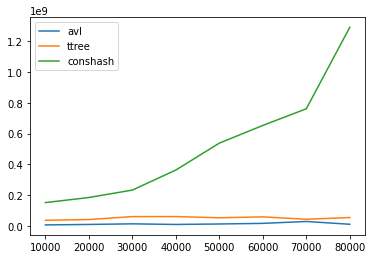

In [41]:
plt.plot(x,avl, label = "avl")
plt.plot(x, ttree, label = "ttree")
plt.plot(x, conshash, label = "conshash")
plt.legend()
plt.show()

In [26]:
def gen_range(max_range,number_in_ranges,num):
    k=[]
    for i in range(0,num):
        tmp = random .randrange(max_range-num);
        k.append(SearchRange(tmp,tmp+number_in_ranges))
    return k
print(gen_range(100,10,3)[0])

start: 76, end:86


In [30]:
%%capture
x = []
avl = []
ttree = []
conshash = []
for i in range(10000,90000,10000): #[13000]
    input_data = [j for j in range(0,i)] 
    search = gen_range(i,2000,10)
    x.append(i)
    avl.append(range_search_AVL_tree(input_data,search))
    ttree.append(range_search_T_tree(input_data,search))
    conshash.append(search_begin(input_data,search))

In [31]:
avl

[35691200,
 68931500,
 40184500,
 43305600,
 56862000,
 27889800,
 34906300,
 38741500]

In [32]:
ttree

[7979500, 6124400, 3355700, 6972800, 3120800, 4949900, 7221200, 6977600]

In [33]:
conshash 

[998500, 3224000, 6635300, 5984600, 5985900, 10845600, 42438600, 16942600]

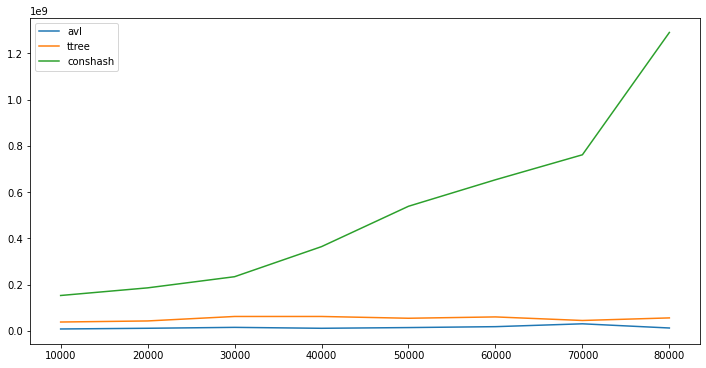

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(x,avl, label = "avl")
plt.plot(x, ttree, label = "ttree")
plt.plot(x, conshash, label = "conshash")
plt.legend()
plt.show()

# Brudnopis

In [ ]:
for i in range(10,15,1):
    input_data = [j for j in range(0,i)] 

    search = [4]#random.sample(input_data, int(i/10))
    print(input_data)
    print(search)
    
    k=delete_T_tree(input_data,search)
    print(k)
    break

In [ ]:

for i in range(10000,100000,1000):
    input_data = [j for j in range(0,i)] 
    search = random.sample(input_data, int(i/10))
    k=single_search_AVL_tree(input_data,search)
    break
    print(k)
    

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot([1,2,3],[15,58,99], label = "line 1")
plt.plot([1,2,3], [4,4,4], label = "line 2")

plt.legend()
plt.show()